# Data-X Spring 2018: Homework 02

### Regression, Classification, Webscraping

**Authors:** Sana Iqbal (Part 1, 2, 3), Alexander Fred-Ojala (Extra Credit)


In this homework, you will do some exercises with prediction-classification, regression and web-scraping.


## Part 1


### Data:
__Data Source__:
Data file is uploaded to bCourses and is named: __Energy.csv__

The dataset was created by Angeliki Xifara ( Civil/Structural Engineer) and was processed by Athanasios Tsanas, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

__Data Description__:

The dataset contains eight attributes of a building (or features, denoted by X1...X8) and response being the heating load on the building, y1. 

* X1	Relative Compactness 
* X2	Surface Area 
* X3	Wall Area 
*  X4	Roof Area 
*  X5	Overall Height 
* X6	Orientation 
*  X7	Glazing Area 
*  X8	Glazing Area Distribution 
*  y1	Heating Load 


#### Q1:Read the data file in python. Describe data features in terms of type, distribution range and mean values. Plot feature distributions.This step should give you clues about data sufficiency.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
edf = pd.read_csv("Energy.csv")
edf.dtypes

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
dtype: object

In [3]:
edf.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [4]:
edf.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000


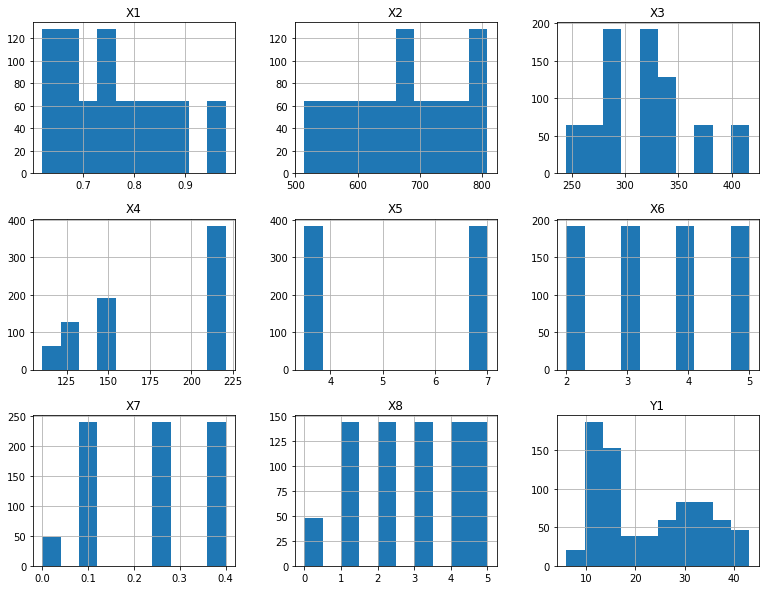

In [5]:
edf.hist(figsize=(13,10))
plt.show()

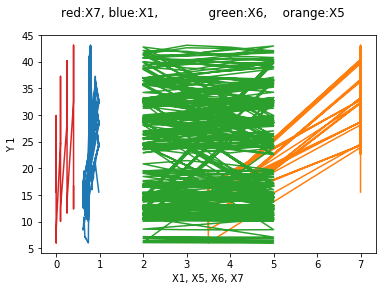

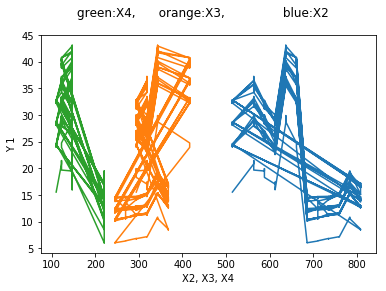

In [6]:
fig = plt.figure()
plt.plot(edf.X1,edf.Y1,edf.X5,edf.Y1,edf.X6,edf.Y1,edf.X7,edf.Y1)
fig.suptitle('red:X7, blue:X1,             green:X6,    orange:X5')
plt.xlabel('X1, X5, X6, X7')
plt.ylabel('Y 1')
plt.show()
fig = plt.figure()
plt.plot(edf.X2,edf.Y1,edf.X3,edf.Y1,edf.X4,edf.Y1)
fig.suptitle('green:X4,      orange:X3,               blue:X2')
plt.xlabel('X2, X3, X4')
plt.ylabel('Y 1')
plt.show()

 __REGRESSION__:
LABELS ARE CONTINUOUS VALUES.
Here the model is trained to predict a continuous value for each instance.
On inputting a feature vector into the model, the trained model is able to predict a continuous value  for  that instance.  

__Q2.1: Train a linear regression model on 85 percent of the given dataset, what is the intercept value and coefficient values.__



In [7]:
X = edf.drop('Y1', axis=1)
y = edf[['Y1']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [8]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for X1 is -68.37759868527567
The coefficient for X2 is -0.06744844293000013
The coefficient for X3 is 0.03610800749709725
The coefficient for X4 is -0.05177822521080954
The coefficient for X5 is 4.0939721582594535
The coefficient for X6 is 0.0034008268848426666
The coefficient for X7 is 19.507795852767625
The coefficient for X8 is 0.21355885113065828


In [10]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 90.85363891173049



#### Q.2.2: Report model performance using 'ROOT MEAN SQUARE' error metric on:  
__1. Data that was used for training(Training error)__   
__2. On the 15 percent of unseen data (test error) __ 



In [11]:
import math
from sklearn.metrics import mean_squared_error
y_predict = regression_model.predict(X_train)
regression_model_mse = mean_squared_error(y_predict, y_train)
original_training_error = math.sqrt(regression_model_mse)
print("training error : ",original_training_error)

training error :  2.939119110518241


In [12]:
y_predict = regression_model.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
original_testing_error = math.sqrt(regression_model_mse)
print("testing error : ",original_testing_error)

testing error :  2.8112402672611596



__ Q2.3: Lets us see the effect of amount of data on the performance of prediction model.Use varying amounts of  Training data (100,200,300,400,500,all) to train regression models and report  training error and validation error in each case. Validation data/Test data   is the same as above for  all  these cases.__  

Plot error rates vs number of training examples.Comment on the relationshipyou observe in the plot, between the amount of data used to train the model and the validation accuracy of the model.

__Hint:__ Use array indexing to choose varying data amounts

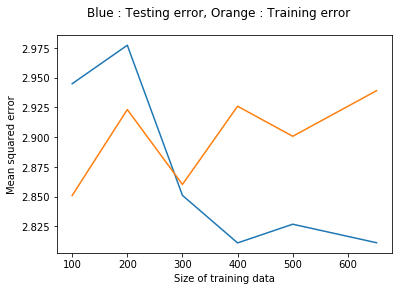

In [13]:
arr = [100,200,300,400,500,y.shape[0] - y_test.shape[0]]
train_e = []
val_e = []
for i in range(0,len(arr)):
    regression_model = LinearRegression()
    regression_model.fit(X_train.head(arr[i]), y_train.head(arr[i]))
    y_predict = regression_model.predict(X_train.head(arr[i]))
    regression_model_mse = mean_squared_error(y_predict, y_train.head(arr[i]))
    train_e.append(math.sqrt(regression_model_mse))
    y_predict = regression_model.predict(X_test)
    regression_model_mse = mean_squared_error(y_predict, y_test)
    val_e.append(math.sqrt(regression_model_mse))
fig = plt.figure()
plt.plot(arr,val_e,arr,train_e)
fig.suptitle('Blue : Testing error, Orange : Training error')
plt.xlabel('Size of training data')
plt.ylabel('Mean squared error')
plt.show()
#Error doesn't increase of decrease uniformly, it depends on how data is shuffled 
#yet prediction of testing data is more better when data is most


__CLASSIFICATION__:
LABELS ARE DISCRETE VALUES.
Here the model is trained to classify each instance into a set of predefined  discrete classes.
On inputting a feature vector into the model, the trained model is able to predict a  class of that instance. You can also output the probabilities of an instance belnging to a class.  

__ Q 3.1:  Bucket values of 'y1' i.e 'Heating Load'  from the original dataset into 3 classes:__ 

0: 'Low' ( < 15),   
1: 'Medium'  (15-30),   
2: 'High'  (>30)

This converts the given dataset  into a classification problem, classes being, Heating load is: *low, medium or high*. Use this datset with transformed 'heating load' for creating a  logistic regression classifiction model that predicts heating load type of a building. Use test-train split ratio of 0.15.  

*Report training and test accuracies and  confusion matrices.*


**HINT:** Use pandas.cut

In [14]:
arr = []
for i in range (0,len(edf)):
    if (edf['Y1'][i] > 30.0):
        arr.append("High")
    elif (edf['Y1'][i] < 15.0):
        arr.append("Low")
    else:
        arr.append("Medium")
edf['class'] = arr

X = edf.drop('class', axis=1)
y = edf['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

from sklearn.linear_model import LogisticRegression
regression_model = LogisticRegression()
regression_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_predict = regression_model.predict(X_train)
print("accuracy score of y_train :",accuracy_score(y_train,y_predict))
from sklearn.metrics import confusion_matrix
print("confusion matrix :\n",confusion_matrix(y_train,y_predict))
y_predict = regression_model.predict(X_test)
print("\naccuracy score of y_test :",accuracy_score(y_test,y_predict))
print("confusion matrix :\n",confusion_matrix(y_test,y_predict))

accuracy score of y_train : 0.980061349693
confusion matrix :
 [[173   0   1]
 [  0 243   0]
 [  0  12 223]]

accuracy score of y_test : 0.98275862069
confusion matrix :
 [[27  0  0]
 [ 0 42  0]
 [ 0  2 45]]


__ Q2.2: One of the preprocessing steps in Data science is Feature Scaling i.e getting all our data on the same scale by setting same  Min-Max of feature values. This makes training less sensitive to the scale of features . Scaling is important in algorithms that use distance based classification, SVM or K means or involve gradient descent optimization.If we  Scale features in the range [0,1] it is called unity based normalization.__

__Perform unity based normalization on the above dataset and train the model again, compare model performance in training and validation with your previous model.__  

refer:http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler  
more at: https://en.wikipedia.org/wiki/Feature_scaling

In [15]:
arr = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1']
for i in range (0,len(arr)):
    num = (max(edf[arr[i]])-min(edf[arr[i]]))
    temp = []
    for j in range (0,len(edf)):
        temp.append((edf[arr[i]][j]-min(edf[arr[i]]))/num)
    edf[arr[i]] = temp
X = edf.drop(['Y1','class'], axis=1)
y = edf['Y1']
regression_model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
regression_model.fit(X_train, y_train)
y_predict = regression_model.predict(X_train)
regression_model_mse = mean_squared_error(y_predict, y_train)
print("Linear regression model:\n\nPrevious training error : ",original_training_error)
print("Current  training error : ",math.sqrt(regression_model_mse))
print("\nPrevious testing error  : ",original_testing_error)
y_predict = regression_model.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
print("Current  testing error  : ",math.sqrt(regression_model_mse))

Linear regression model:

Previous training error :  2.939119110518241
Current  training error :  0.07994173388629974

Previous testing error  :  2.8112402672611596
Current  testing error  :  0.07144426527057152


## Part 2



__ 1. Read __`diabetesdata.csv`__ file into a pandas dataframe. Analyze the data features, check for NaN values. 
About the data: __

1. __TimesPregnant__: Number of times pregnant 
2. __glucoseLevel__: Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. __BP__: Diastolic blood pressure (mm Hg)  
5. __insulin__: 2-Hour serum insulin (mu U/ml) 
6. __BMI__: Body mass index (weight in kg/(height in m)^2) 
7. __pedigree__: Diabetes pedigree function 
8. __Age__: Age (years) 
9. __IsDiabetic__: 0 if not diabetic or 1 if diabetic) 

__ 2. Preprocess data to replace NaN values in a feature(if any) using mean of the feature.  
Train  logistic regression, SVM, perceptron, kNN, xgboost and random forest models using this preprocessed data with 20% test split.Report training and test accuracies.__







In [16]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron

import xgboost as xgb

df = pd.read_csv("diabetesdata.csv")
df.isnull().sum()

D:\python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


TimesPregnant     0
glucoseLevel     34
BP                0
insulin           0
BMI               0
Pedigree          0
Age              33
IsDiabetic        0
dtype: int64

In [17]:
df.dtypes

TimesPregnant      int64
glucoseLevel     float64
BP                 int64
insulin            int64
BMI              float64
Pedigree         float64
Age              float64
IsDiabetic         int64
dtype: object

In [18]:
df.head()

,TimesPregnant,glucoseLevel,BP,insulin,BMI,Pedigree,Age,IsDiabetic
0,6,148.0,72,0,33.6,0.627,50.0,1
1,1,NaN,66,0,26.6,0.351,31.0,0
2,8,183.0,64,0,23.3,0.672,NaN,1
3,1,NaN,66,94,28.1,0.167,21.0,0
4,0,137.0,40,168,43.1,2.288,33.0,1


In [19]:
df['IsDiabetic'].value_counts()

0    500
1    268
Name: IsDiabetic, dtype: int64

D:\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


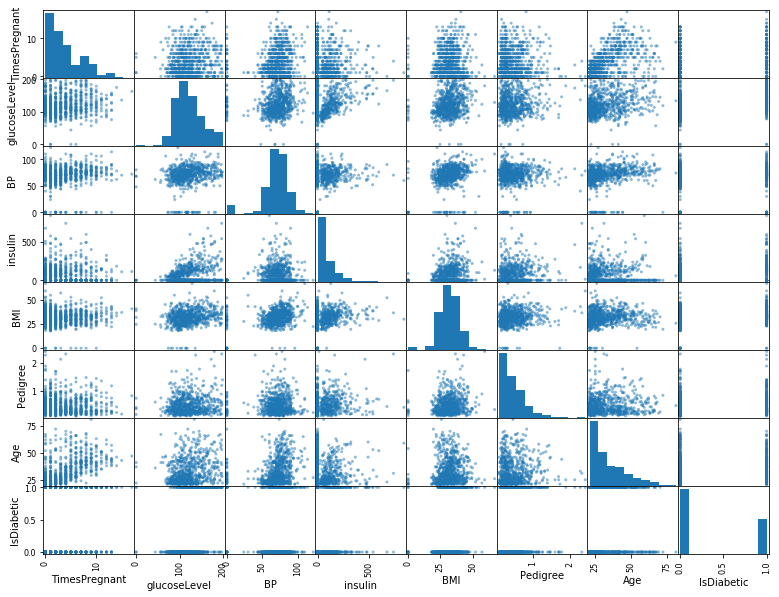

In [20]:
pd.tools.plotting.scatter_matrix(df,figsize=(13,10));

In [21]:
#Remove NaN in age by replacing with mean of ages
df[['Age']] = df[['Age']].fillna(value=np.mean(df.Age))
df.isnull().sum()

TimesPregnant     0
glucoseLevel     34
BP                0
insulin           0
BMI               0
Pedigree          0
Age               0
IsDiabetic        0
dtype: int64

In [22]:
#Remove NaN in glucoseLevel by replacing with mean of glucoseLevel
df[['glucoseLevel']] = df[['glucoseLevel']].fillna(value=np.mean(df.glucoseLevel))
df.isnull().sum()

TimesPregnant    0
glucoseLevel     0
BP               0
insulin          0
BMI              0
Pedigree         0
Age              0
IsDiabetic       0
dtype: int64

In [23]:
df.describe()

,TimesPregnant,glucoseLevel,BP,insulin,BMI,Pedigree,Age,IsDiabetic
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.016349,69.105469,79.799479,31.992578,0.471876,33.353741,0.348958
std,3.369578,30.950560,19.355807,115.244002,7.884160,0.331329,11.516896,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,62.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,119.000000,72.000000,30.500000,32.000000,0.372500,30.000000,0.000000
75%,6.000000,139.000000,80.000000,127.250000,36.600000,0.626250,40.000000,1.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
df.head()

,TimesPregnant,glucoseLevel,BP,insulin,BMI,Pedigree,Age,IsDiabetic
0,6,148.000000,72,0,33.6,0.627,50.000000,1
1,1,121.016349,66,0,26.6,0.351,31.000000,0
2,8,183.000000,64,0,23.3,0.672,33.353741,1
3,1,121.016349,66,94,28.1,0.167,21.000000,0
4,0,137.000000,40,168,43.1,2.288,33.000000,1


In [25]:
#I showed the code to you prior submitting

#Using logistic regression
X = df.drop('IsDiabetic', axis=1)
y = df['IsDiabetic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

regression_model = LogisticRegression()
regression_model.fit(X_train, y_train)

y_predict = regression_model.predict(X_train)
print("Using Logistical regression -\naccuracy score of y_train :",accuracy_score(y_train,y_predict))
y_predict = regression_model.predict(X_test)
print("accuracy score of y_test :",accuracy_score(y_test,y_predict))

Using Logistical regression -
accuracy score of y_train : 0.78338762215
accuracy score of y_test : 0.75974025974


In [26]:
svc = SVC()
svc.fit(X_train, y_train)
y_predict = svc.predict(X_train)
print("Using Support Vector Machine Classifier -\naccuracy score of y_train :",accuracy_score(y_train,y_predict))
y_predict = svc.predict(X_test)
print("accuracy score of y_test :",accuracy_score(y_test,y_predict))

Using Support Vector Machine Classifier -
accuracy score of y_train : 1.0
accuracy score of y_test : 0.636363636364


In [27]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_train)
print("Using KNN -\naccuracy score of y_train :",accuracy_score(y_train,y_predict))
y_predict = knn.predict(X_test)
print("accuracy score of y_test :",accuracy_score(y_test,y_predict))

Using KNN -
accuracy score of y_train : 0.846905537459
accuracy score of y_test : 0.681818181818


In [28]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_predict = perceptron.predict(X_train)
print("Using Perceptron -\naccuracy score of y_train :",accuracy_score(y_train,y_predict))
y_predict = perceptron.predict(X_test)
print("accuracy score of y_test :",accuracy_score(y_test,y_predict))

Using Perceptron -
accuracy score of y_train : 0.578175895765
accuracy score of y_test : 0.616883116883


D:\python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [29]:
gradboost = xgb.XGBClassifier(n_estimators=1000)
gradboost.fit(X_train, y_train)
y_predict = gradboost.predict(X_train)
print("Using XGBoost -\naccuracy score of y_train :",accuracy_score(y_train,y_predict))
y_predict = gradboost.predict(X_test)
print("accuracy score of y_test :",accuracy_score(y_test,y_predict))

Using XGBoost -
accuracy score of y_train : 1.0
accuracy score of y_test : 0.701298701299


In [30]:
random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, y_train)
y_predict = random_forest.predict(X_train)
print("Using Random Forest -\naccuracy score of y_train :",accuracy_score(y_train,y_predict))
y_predict = random_forest.predict(X_test)
print("accuracy score of y_test :",accuracy_score(y_test,y_predict))

Using Random Forest -
accuracy score of y_train : 1.0
accuracy score of y_test : 0.733766233766




__3. What is the  ratio of diabetic persons in 3 equirange bands of 'BMI' and 'Pedigree' in the provided dataset.__

 __Convert these features - 'BP','insulin','BMI' and 'Pedigree'   into categorical values by mapping different bands of values of these features to integers 0,1,2.__  
 
HINT: USE pd.cut with bin=3 to create 3 bins






In [31]:
df.BP = pd.cut(df.BP,bins=3,labels=[0,1,2])
df.insulin = pd.cut(df.insulin,bins=3,labels=[0,1,2])
df.BMI = pd.cut(df.BMI,bins=3,labels=[0,1,2])
df.Pedigree = pd.cut(df.Pedigree,bins=3,labels=[0,1,2])
df.head()

,TimesPregnant,glucoseLevel,BP,insulin,BMI,Pedigree,Age,IsDiabetic
0,6,148.000000,1,0,1,0,50.000000,1
1,1,121.016349,1,0,1,0,31.000000,0
2,8,183.000000,1,0,1,0,33.353741,1
3,1,121.016349,1,0,1,0,21.000000,0
4,0,137.000000,0,0,1,2,33.000000,1


In [32]:
z=0
o=0
t=0
for i in range (0,len(df)):
    if(df.BMI[i]==0):
        if(df.IsDiabetic[i]==1):
            z = z+1
    elif(df.BMI[i]==1):
        if(df.IsDiabetic[i]==1):
            o = o+1
    else:
        if(df.IsDiabetic[i]==1):
            t = t+1
print("Ratio of diabetic person having BMI 0 : 1 : 2 is ",z/(z+o+t)," : ",o/(z+o+t)," : ",t/(z+o+t))

Ratio of diabetic person having BMI 0 : 1 : 2 is  0.007462686567164179  :  0.9104477611940298  :  0.08208955223880597


In [33]:
z=0
o=0
t=0
for i in range (0,len(df)):
    if(df.Pedigree[i]==0):
        if(df.IsDiabetic[i]==1):
            z = z+1
    elif(df.Pedigree[i]==1):
        if(df.IsDiabetic[i]==1):
            o = o+1
    else:
        if(df.IsDiabetic[i]==1):
            t = t+1
print("Ratio of diabetic person having Pedigree 0 : 1 : 2 is ",z/(z+o+t)," : ",o/(z+o+t)," : ",t/(z+o+t))

Ratio of diabetic person having Pedigree 0 : 1 : 2 is  0.835820895522388  :  0.14925373134328357  :  0.014925373134328358



__4. Now consider the original dataset again, instead of generalizing the NAN values with the mean of the feature we will try assigning values to NANs based on some hypothesis. For example for age we assume that the relation between BMI and BP of people is a reflection of the age group.We can have 9 types of BMI and BP relations and our aim is to find the median age of each of that group:__

Your Age guess matrix will look like this:  

| BMI | 0       | 1      | 2  |
|-----|-------------|------------- |----- |
| BP  |             |              |      |
| 0   | a00         | a01          | a02  |
| 1   | a10         | a11          | a12  |
| 2   | a20         | a21          |  a22 |


__Create a guess_matrix  for NaN values of *'Age'* ( using 'BMI' and 'BP')  and  *'glucoseLevel'*  (using 'BP' and 'Pedigree') for the given dataset and assign values accordingly to the NaNs in 'Age' or *'glucoseLevel'* .__


Refer to how we guessed age in the titanic notebook in the class.



In [34]:
df = pd.read_csv("diabetesdata.csv")
df.BP = pd.cut(df.BP,bins=3,labels=[0,1,2])
df.insulin = pd.cut(df.insulin,bins=3,labels=[0,1,2])
df.BMI = pd.cut(df.BMI,bins=3,labels=[0,1,2])
df.Pedigree = pd.cut(df.Pedigree,bins=3,labels=[0,1,2])

In [35]:
guess_ages = np.zeros((3,3),dtype=int)
for i in range(0, 3):
        for j in range(0,3):
            guess_df = df[(df['BMI'] == i) & (df['BP'] == j)]['Age'].dropna()
            age_guess = guess_df.median()
            guess_ages[i,j] = int(age_guess)
for i in range(0, 3):
        for j in range(0, 3):
            df.loc[ (df.Age.isnull()) & (df.BMI == i) & (df.BP == j),'Age'] = guess_ages[i,j]         
df['Age'] = df['Age'].astype(int)
guess_ages

array([[24, 25, 55],
       [29, 29, 37],
       [33, 32, 31]])

In [36]:
df.head()

,TimesPregnant,glucoseLevel,BP,insulin,BMI,Pedigree,Age,IsDiabetic
0,6,148.0,1,0,1,0,50,1
1,1,NaN,1,0,1,0,31,0
2,8,183.0,1,0,1,0,29,1
3,1,NaN,1,0,1,0,21,0
4,0,137.0,0,0,1,2,33,1


In [37]:
guess_ages = np.zeros((3,3),dtype=int)
for i in range(0, 3):
        for j in range(0,3):
            guess_df = df[(df['Pedigree'] == i) & (df['BP'] == j)]['glucoseLevel'].dropna()
            age_guess = guess_df.median()
            guess_ages[i,j] = int(age_guess)
for i in range(0, 3):
        for j in range(0, 3):
            df.loc[ (df.glucoseLevel.isnull()) & (df.Pedigree == i) & (df.BP == j),'glucoseLevel'] = guess_ages[i,j]
guess_ages

array([[115, 112, 133],
       [127, 115, 129],
       [137, 149, 159]])

In [38]:
df.head()

,TimesPregnant,glucoseLevel,BP,insulin,BMI,Pedigree,Age,IsDiabetic
0,6,148.0,1,0,1,0,50,1
1,1,112.0,1,0,1,0,31,0
2,8,183.0,1,0,1,0,29,1
3,1,112.0,1,0,1,0,21,0
4,0,137.0,0,0,1,2,33,1




__5. Now, convert 'glucoseLevel' and 'Age' features also to categorical variables of 5 categories each.__

__Use this dataset (with all features in categorical form) to train perceptron, logistic regression and random forest models using 20% test split. Report training and test accuracies.__







In [39]:
df.Age = pd.cut(df.Age,bins=5,labels=[21,36,51,66,81])
df.glucoseLevel = pd.cut(df.glucoseLevel,bins=5,labels=[0,50,100,150,200])
df.head()

,TimesPregnant,glucoseLevel,BP,insulin,BMI,Pedigree,Age,IsDiabetic
0,6,150,1,0,1,0,51,1
1,1,100,1,0,1,0,21,0
2,8,200,1,0,1,0,21,1
3,1,100,1,0,1,0,21,0
4,0,150,0,0,1,2,21,1


In [40]:
X = df.drop('IsDiabetic', axis=1)
y = df['IsDiabetic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [41]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_predict = perceptron.predict(X_train)
print("Using Perceptron -\naccuracy score of y_train :",accuracy_score(y_train,y_predict))
y_predict = perceptron.predict(X_test)
print("accuracy score of y_test :",accuracy_score(y_test,y_predict))

Using Perceptron -
accuracy score of y_train : 0.659609120521
accuracy score of y_test : 0.694805194805


D:\python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [42]:
regression_model = LogisticRegression()
regression_model.fit(X_train, y_train)

y_predict = regression_model.predict(X_train)
print("Using Logistical regression -\naccuracy score of y_train :",accuracy_score(y_train,y_predict))
y_predict = regression_model.predict(X_test)
print("accuracy score of y_test :",accuracy_score(y_test,y_predict))

Using Logistical regression -
accuracy score of y_train : 0.750814332248
accuracy score of y_test : 0.75974025974


In [43]:
random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, y_train)
y_predict = random_forest.predict(X_train)
print("Using Random Forest -\naccuracy score of y_train :",accuracy_score(y_train,y_predict))
y_predict = random_forest.predict(X_test)
print("accuracy score of y_test :",accuracy_score(y_test,y_predict))

Using Random Forest -
accuracy score of y_train : 0.889250814332
accuracy score of y_test : 0.753246753247


### Part 3

1. __Derive the expression for the optimal parameters in the linear regression equation, i.e. solve the normal equation for Ordinary Least Squares for the case of Simple Linear Regression, when we only have one input and one output__

Given a set of _n_ points $(X_i,Y_i)$ where $Yi$ is dependent on $Xi$ by a linear relation,  find the best-fit line,$$Z_i = {aX_i + b}$$  that minimizes the __sum of squared errors in Y__,i.e: $$minimize \sum_{i}{(Y_i- Z_i)^2}$$
__i. __ Show that $$ intercept \quad b = \overline{Y}-  a.\overline{X}\quad  and   \quad slope \quad a = \frac{\sum_{i}{(\overline{Y} - Y_i).(X_i - \overline{X})}}{\sum_{i}{(X_i - \overline{X})^2}}$$


 where $\overline{X}$ and  $\overline{Y}$ are the averages of the X values and the Y values, respectively.
 
__ ii. __Show that slope _a_ can be written as $ a = r.(S_y /S_x)$ where $S_y$  = the standard deviation of the Y values and $S_x$= the standard deviation of the X values and _r_ is the correlation coefficient.

##### Please try to write a nice LateXed version of your answer, and do the derivations of the expressions as nicely as possible


_____

__Part i)__ $$Z_i = {aX_i + b}\quad\quad-1$$  
$$f(a,b) = \sum_{i}{(Y_i- Z_i)^2}$$

Minimizing the function requires us to calculate it's first order derivative -

$$\frac{d(f(a,b))}{db} = -2\sum_{i}{(Y_i- aX_i - b)} = 0$$
$$\frac{d(f(a,b))}{da} = -2(\sum_{i}{(Y_i- aX_i - b)})X_i = 0$$

__For b -__
$$-2\sum_{i}{(Y_i- a.X_i - b)} = 0$$
$$\sum_{i}{(Y_i- a.X_i - b)} = 0$$
$$\overline{Y}-  a.\overline{X} - b = 0$$
$$ intercept \quad b = \overline{Y}-  a.\overline{X}\quad\quad-2$$  

__For a -__
$$-2\sum_{i}{(Y_i - a.X_i - b).X_i} = 0$$
$$\sum_{i}{(Y_i - a.X_i - b).X_i} = 0$$
From 2 -
$$\sum_{i}{(Y_i - a.X_i - (\overline{Y}-  a.\overline{X})).X_i} = 0$$
$$\sum_{i}{(Y_i - \overline{Y} - a.X_i +  a.\overline{X})} = 0$$
$$\sum_{i}{(Y_i - \overline{Y})} = -a.(\sum_{i}{(X_i - \overline{X})})$$
$$\frac{\sum_{i}{(\overline{Y} - Y_i)}}{\sum_{i}{(X_i - \overline{X})}} = a$$
$$\quad slope \quad a = \frac{\sum_{i}{(\overline{Y} - Y_i).(X_i - \overline{X})}}{\sum_{i}{(X_i - \overline{X})^2}}\quad\quad-3$$

__Part ii)__
$$S_y = \sum_{i}{(\overline{Y} - Y_i).(X_i - \overline{X})}$$
$$S_x = \sum_{i}{(X_i - \overline{X})^2}$$
from 3 - 
$$ a = r.\frac{S_y}{S_x}$$

# Two Extra Credit Points: Fun with Webscraping & Text manipulation
### (Mandatory for Grad students!)

<div class='alert alert-info'> `NOTE:` **If you are a Graduate Section student (enrolled in 290), the Extra Credit Questions are mandatory.**</div>

## 1. Statistics in Presidential Debates

Your first task is to scrape Presidential Debates from the Commission of Presidential Debates website: http://www.debates.org/index.php?page=debate-transcripts.

To do this, you are not allowed to manually look up the URLs that you need, instead you have to scrape them. The root url to be scraped is the one listed above, namely: http://www.presidency.ucsb.edu/debates.php


1. By using `requests` and `BeautifulSoup` find all the links / URLs on the website that links to transcriptions of **First Presidential Debates** from the years [2012, 2008, 2004, 2000, 1996, 1988, 1984, 1976, 1960]. In total you should find 9 links / URLs tat fulfill this criteria.
2. When you have a list of the URLs your task is to create a Data Frame with some statistics (see example of output below):
    1. Scrape the title of each link and use that as the column name in your Data Frame. 
    2. Count how long the transcript of the debate is (as in the number of characters in transcription string). Feel free to include `\` characters in your count, but remove any breakline characters, i.e. `\n`. You will get credit if your count is +/- 10% from our result.
    3. Count how many times the word **war** was used in the different debates. Note that you have to convert the text in a smart way (to not count the word **warranty** for example, but counting **war.**, **war!**, **war,** or **War** etc.
    4. Also scrape the most common used word in the debate, and write how many times it was used. Note that you have to use the same strategy as in 3 in order to do this.
    
**Tips:**

___

In order to solve question 3 and 4 above it can be useful to work with Regular Expressions and explore methods on strings like `.strip(), .replace(), .find(), .count(), .lower()` etc. Both are very powerful tools to do string processing in Python. To count common words for example I used a `Counter` object and a Regular expression pattern for only words, see example:

```python
    from collections import Counter
    import re

    counts = Counter(re.findall(r"[\w']+", text.lower()))
```

Read more about Regular Expressions here: https://docs.python.org/3/howto/regex.html
    
    
**Example output of all of the answers to EC Question 1:**


![pres_stats](https://github.com/ikhlaqsidhu/data-x/raw/master/x-archive/misc/hw2_imgs_spring2018/president_stats.png)




----

.




In [44]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>")) 
from __future__ import division, print_function
import requests # The requests library is an HTTP library for getting content and posting etc.
import bs4 as bs # BeautifulSoup4 is a Python library

In [45]:
source = requests.get("http://www.debates.org/index.php?page=debate-transcripts",)
soup = bs.BeautifulSoup(source.content, features='html.parser') 
all_links = soup.find_all("a")
l1=[]
row0 = []
for link in all_links:
    if "First" in str(link.string):
        if not ("1992" or "1980") in str(link.string):
            if not "half" in str(link.string):
                l1.append(str(link.get("href")))
                row0.append(str(link.string))
row0

['October 3, 2012: The First Obama-Romney Presidential Debate',
 'September 26, 2008: The First McCain-Obama Presidential Debate',
 'September 30, 2004: The First Bush-Kerry Presidential Debate',
 'October 3, 2000: The First Gore-Bush Presidential Debate',
 'October 6, 1996: The First Clinton-Dole Presidential Debate',
 'September 25, 1988: The First Bush-Dukakis Presidential Debate',
 'October 7, 1984: The First Reagan-Mondale Presidential Debate',
 'September 23, 1976: The First Carter-Ford Presidential Debate',
 'September 26, 1960: The First Kennedy-Nixon Presidential Debate']

In [46]:
import re
l2 = []
for i in range (0,9):
    s=""
    e=0
    source = requests.get(l1[i])
    soup = bs.BeautifulSoup(source.content, features='html.parser') 
    soup = soup.find("div", {"id": "content-sm"})
    s=str(soup)
    s = re.sub('<[^>]+>', '', s)
    s=s.replace("\n","")
    l2.append(s)

In [47]:
row1 = []
for i in range (0,9):
    row1.append(len(l2[i]))
row1

[94627, 182422, 82721, 91066, 93094, 87494, 86687, 80740, 60937]

In [48]:
row2 = []
for i in range (0,9):
    #temp = l2[i][:] 
    l2[i] = l2[i].replace("\'"," ")
    l2[i] = l2[i].replace(","," ")
    l2[i] = l2[i].replace("."," ")
    l2[i] = l2[i].replace("!"," ")
    l2[i] = l2[i].replace("War","war")
    l2[i] = l2[i].replace("Wars","wars")
    row2.append(int(l2[i].count("war ")) + int(l2[i].count("wars")))
row2

[5, 48, 63, 11, 15, 13, 3, 7, 3]

In [49]:
row3 = []
row4 = []
for j in range (0,9):
    l = l2[j].split()
    for i in range (0,len(l)):
        l[i] = l[i].lower()
    wordfreq = []
    for w in l:
        wordfreq.append(l.count(w))
    row4.append(max(wordfreq))
    row3.append(l[wordfreq.index(max(wordfreq))])
print(row3,row4)

['the', 'the', 'the', 'the', 'the', 'the', 'the', 'the', 'the'] [757, 1468, 852, 916, 875, 798, 844, 855, 778]


In [50]:
col = []
index = ['Debate char length', 'War_count', 'Most_common_w', 'Most_common_w_count']
df = pd.DataFrame([],index=index)
for i in range(0,9):
    col.append([row1[i],row2[i],row3[i],row4[i]])
    df[row0[i]] = col[i]
df

,"October 3, 2012: The First Obama-Romney Presidential Debate","September 26, 2008: The First McCain-Obama Presidential Debate","September 30, 2004: The First Bush-Kerry Presidential Debate","October 3, 2000: The First Gore-Bush Presidential Debate","October 6, 1996: The First Clinton-Dole Presidential Debate","September 25, 1988: The First Bush-Dukakis Presidential Debate","October 7, 1984: The First Reagan-Mondale Presidential Debate","September 23, 1976: The First Carter-Ford Presidential Debate","September 26, 1960: The First Kennedy-Nixon Presidential Debate"
Debate char length,94627,182422,82721,91066,93094,87494,86687,80740,60937
War_count,5,48,63,11,15,13,3,7,3
Most_common_w,the,the,the,the,the,the,the,the,the
Most_common_w_count,757,1468,852,916,875,798,844,855,778


##    
## 2. Download and read in specific line from many data sets

Scrape the first 27 data sets from this URL http://people.sc.fsu.edu/~jburkardt/datasets/regression/ (i.e.`x01.txt` - `x27.txt`). Then, save the 5th line in each data set, this should be the name of the data set author (get rid of the `#` symbol, the white spaces and the comma at the end). 

Count how many times (with a Python function) each author is the reference for one of the 27 data sets. Showcase your results, sorted, with the most common author name first and how many times he appeared in data sets. Use a Pandas DataFrame to show your results, see example.

**Example output of the answer EC Question 2:**

![author_stats](https://github.com/ikhlaqsidhu/data-x/raw/master/x-archive/misc/hw2_imgs_spring2018/data_authors.png)


In [51]:
source = requests.get("http://people.sc.fsu.edu/~jburkardt/datasets/regression/",)
soup = bs.BeautifulSoup(source.content, features='html.parser') 
all_links = soup.find_all("a")
row0 = []
ran = 0
for link in all_links:
    if "txt" in str(link.string):
        ran = ran + 1
        if ran <28:
            row0.append("http://people.sc.fsu.edu/~jburkardt/datasets/regression/" + str(link.get("href")))
row0

['http://people.sc.fsu.edu/~jburkardt/datasets/regression/x01.txt',
 'http://people.sc.fsu.edu/~jburkardt/datasets/regression/x02.txt',
 'http://people.sc.fsu.edu/~jburkardt/datasets/regression/x03.txt',
 'http://people.sc.fsu.edu/~jburkardt/datasets/regression/x04.txt',
 'http://people.sc.fsu.edu/~jburkardt/datasets/regression/x05.txt',
 'http://people.sc.fsu.edu/~jburkardt/datasets/regression/x06.txt',
 'http://people.sc.fsu.edu/~jburkardt/datasets/regression/x07.txt',
 'http://people.sc.fsu.edu/~jburkardt/datasets/regression/x08.txt',
 'http://people.sc.fsu.edu/~jburkardt/datasets/regression/x09.txt',
 'http://people.sc.fsu.edu/~jburkardt/datasets/regression/x10.txt',
 'http://people.sc.fsu.edu/~jburkardt/datasets/regression/x11.txt',
 'http://people.sc.fsu.edu/~jburkardt/datasets/regression/x12.txt',
 'http://people.sc.fsu.edu/~jburkardt/datasets/regression/x13.txt',
 'http://people.sc.fsu.edu/~jburkardt/datasets/regression/x14.txt',
 'http://people.sc.fsu.edu/~jburkardt/datasets/r

In [52]:
row1 = []
for i in range (0,27):    
    source = requests.get(row0[i])
    soup = bs.BeautifulSoup(source.content, features='html.parser')
    soup = str(soup)
    soup = soup.replace(" ","_")
    soup = soup.replace("\n"," ")
    l = soup.split()
    l[4] = l[4].replace("#____","")
    l[4] = l[4].replace(",","")
    l[4] = l[4].replace("_"," ")
    row1.append(l[4])
row1

['Helmut Spaeth',
 'Helmut Spaeth',
 'Helmut Spaeth',
 'Helmut Spaeth',
 'Helmut Spaeth',
 'R J Freund and P D Minton',
 'D G Kleinbaum and L L Kupper',
 'Helmut Spaeth',
 'D G Kleinbaum and L L Kupper',
 'K A Brownlee',
 'Helmut Spaeth',
 'Helmut Spaeth',
 'S Chatterjee and B Price',
 'Helmut Spaeth',
 'Helmut Spaeth',
 'Helmut Spaeth',
 'Helmut Spaeth',
 'Helmut Spaeth',
 'R J Freund and P D Minton',
 'Helmut Spaeth',
 'Helmut Spaeth',
 'Helmut Spaeth',
 'S Chatterjee B Price',
 'S Chatterjee B Price',
 'S Chatterjee B Price',
 'S C Narula J F Wellington',
 'S C Narula J F Wellington']

In [53]:
b = set(row1)
b = list(b)
b

['R J Freund and P D Minton',
 'S Chatterjee B Price',
 'Helmut Spaeth',
 'K A Brownlee',
 'S Chatterjee and B Price',
 'S C Narula J F Wellington',
 'D G Kleinbaum and L L Kupper']

In [54]:
row2 = []
for i in range(0,len(b)):
    ctr = 0
    for j in range(0,len(row1)):
        if(b[i]==row1[j]):
            ctr += 1
    row2.append(ctr)
row2

[2, 3, 16, 1, 1, 2, 2]

In [55]:
df = pd.DataFrame()
df["Authors"] = b
df["Counts"] = row2
df

,Authors,Counts
0,R J Freund and P D Minton,2
1,S Chatterjee B Price,3
2,Helmut Spaeth,16
3,K A Brownlee,1
4,S Chatterjee and B Price,1
5,S C Narula J F Wellington,2
6,D G Kleinbaum and L L Kupper,2


In [56]:
df.sort_values("Counts",ascending=False)

,Authors,Counts
2,Helmut Spaeth,16
1,S Chatterjee B Price,3
0,R J Freund and P D Minton,2
5,S C Narula J F Wellington,2
6,D G Kleinbaum and L L Kupper,2
3,K A Brownlee,1
4,S Chatterjee and B Price,1
